# Classification sur ACP

## Mastère ESD - Introduction au Machine Learning

### Principe

Utiliser les composantes principales obtenues lors de l'ACP pour réaliser la classification, plutôt que travailler sur les données originales

### Idée générale

L'ACP permet de réduire le *bruit* contenu dans les données, en supprimant les facteurs avec une valeur propre très faible

## Librairies utilisés

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

## Données utilisées

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Réalisation de l'ACP

In [4]:
pca = PCA(n_components = 4)
pca.fit(scale(iris2))

PCA(n_components=4)

## Valeurs propres

In [5]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(iris2.shape[1])], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


## Choix du nombre de facteurs

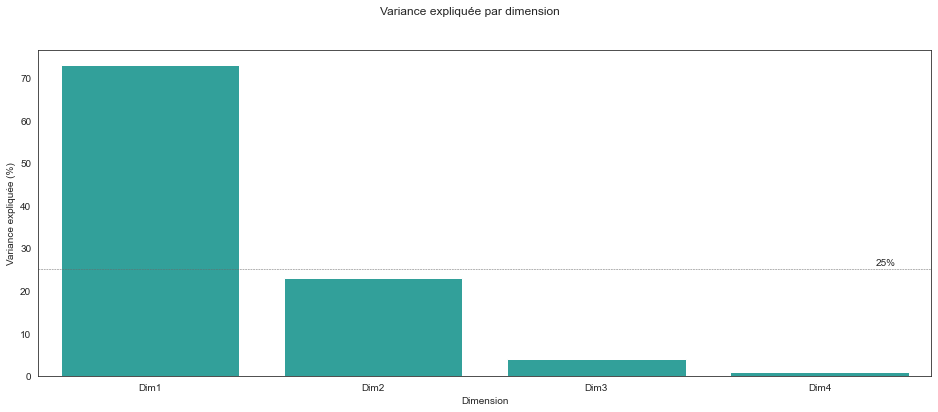

In [6]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "lightseagreen",
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Récupération des 2 premières composantes principales (uniquement)

In [7]:
df = pandas.DataFrame(pca.transform(scale(iris2)),
                      columns = ["Dim" + str(i+1) for i in range(iris2.shape[1])]) \
    .filter(["Dim1", "Dim2"])
df.head()

,Dim1,Dim2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


## Réalisation de $k$-means

In [8]:
kmeans = KMeans(n_clusters = 3, n_init = 20)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=20)

## Information sur la partition

In [9]:
pandas.crosstab(kmeans.labels_, "Nb")

col_0,Nb
row_0,
0,47
1,50
2,53


## Croisement avec les espèces

In [10]:
pandas.crosstab(kmeans.labels_, iris.Species)

Species,setosa,versicolor,virginica
row_0,,,
0,0,11,36
1,50,0,0
2,0,39,14


## Visualisation de la partition

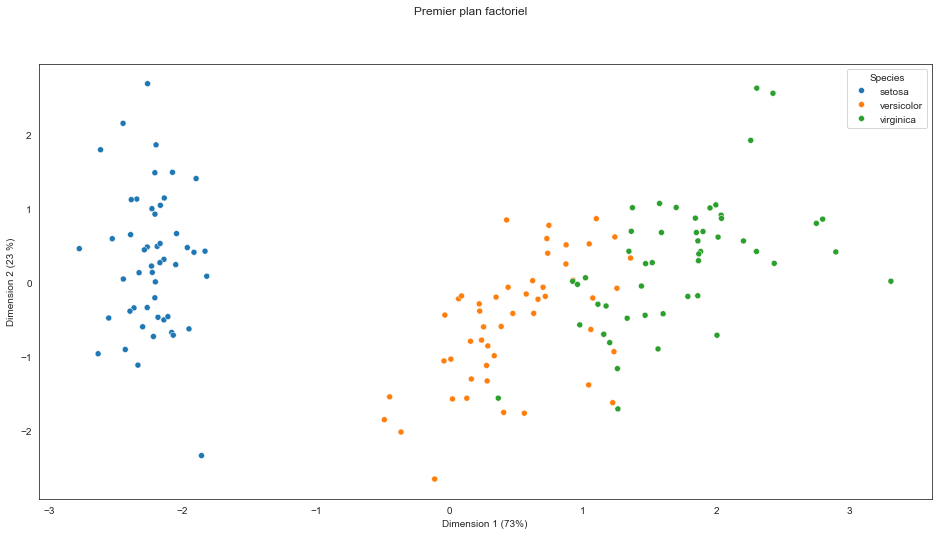

In [11]:
plt.figure(figsize = (16, 8))
g_pca = seaborn.scatterplot(
    x = "Dim1", y = "Dim2", hue = "Species", 
    data = df.assign(Species = iris.Species))
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.figure.suptitle("Premier plan factoriel")

plt.show()